#### The Program involves following features:
Convolutional Neural Network CNN
1. Using Word2Vec implementing CNN model
2. Dispaly Confusion Matrix, precision, recall and F1-score
3. Display few prediction using predict module. 
4. Get 10-fold Average of the CNN model.

Support Vector Method SVM
1. Creating feature vector using TF-IDF and Bag-of-words.
2. Dispaly Confusion Matrix, precision, recall and F1-score
3. Display few prediction using predict module. 
4. Get 10-fold Average of the SVM model.

Random Foresr Method RFM 
1. Creating feature vector using TF-IDF.
2. Dispaly Confusion Matrix, precision, recall and F1-score
3. Display few prediction using predict module. 
4. Get 10-fold Average of the RFM model.

In [2]:
from __future__ import division, print_function

# dataframe
import pandas as pd

# numpy array
import numpy as np

# figures visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import seaborn as sns

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# word2vec
import gensim 
from gensim import models
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

# CNN model and keras preprocessing
import keras
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding, Conv2D, GlobalMaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# nltk data preprocessing
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer

# stopword - remove buzz word
from nltk.corpus import stopwords

# splitting data
from sklearn.model_selection import train_test_split

# punctuation - data imbalance
import collections
import re
import string

# File path
import os
import os.path
from os import path

# Translator
import googletrans
from googletrans import Translator

In [29]:
# original hindi file
filename  = 'Eng-Hin-data/hindi-anot-shuffled'
orig_df = pd.read_csv(filename + '.csv',  
               delimiter=',')
orig_df.columns = ['Text', 'Label']


In [30]:
# Run only for English data 
orig_df["Text"] = orig_df["Text"].astype(str)
orig_df["Label"] = orig_df["Label"].astype(str)

In [31]:
orig_df.head

<bound method NDFrame.head of                                                    Text Label
0     'गाजा में दीवाली   की ढेरो बधाई मित्रो 😊💐  #Is...     2
1        '@SanjayGadhiaINC @IndiaToday18 अज़ाबे इलाही 👍     1
2     'आखिर अब #सुशांत_सिंह_राजपूत जी को न्याय मिल ज...     0
3     'अमीन के 500 से अधिक छात्रों ने सर्वे भवन के ग...     0
4     '@deoriapolice @Uppolice @myogiadityanath @spg...     0
...                                                 ...   ...
8788                  '@atullondhe राहुल गांधी जिंदाबाद     0
8789  'पैगंबर हज़रत मुहम्मद सल्लल्लाहु अलैहि वसल्लम ...     1
8790  'कर्नाटक बेंगलुरू में अल्लाह मोहम्मद गांडू के ...     2
8791  'अच्छी खबर है ऐसे एक एक कर सभी जेहादी भारतीय फ...     2
8792  '@Ruzena__Malik जनता चाइना से दीवाली की लड़ी ख...     0

[8793 rows x 2 columns]>

In [32]:
orig_df.Text[6]

"'आज के दिन ही मेरा क्रिकेट प्रेम भी समाप्त हो गया"

In [33]:
df = orig_df

### Class count

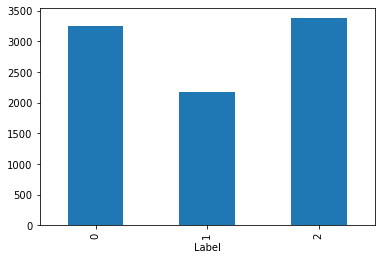

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [35]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

2    3375
0    3244
1    2174
Name: Label, dtype: int64

### Balanced Data

In [36]:
#balancing data 
from collections import Counter
import numpy as np
def balanceClasses(xs, ys):
    item = {}
    new_ys = []
    new_xs = []
    #"""Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
    # the most common class  is the maximum number we want for all classes
    max_allowable = (freqs.most_common()[0][1])
    
    for val in freqs.most_common(): # List
        nums = np.random.randint(1000)
        i = 1
        item[val[0]] = max_allowable - val[1]
        
        if item[val[0]] > 0:            
            while(item[val[0]] - i != 0): 
                nums = nums + 1
                if ys[nums] == val[0]:
                    i += 1
                    new_ys.append(ys[nums])
                    new_xs.append(xs[nums])
    return new_xs, new_ys

In [37]:
new_text, new_label = balanceClasses(df['Text'], df['Label'])

In [38]:
data = pd.DataFrame(new_text)
data.columns = ['Text']
data['Label'] = new_label
data = pd.concat([df, data])

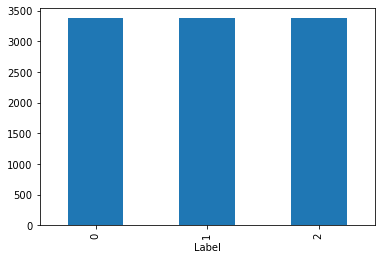

In [39]:
fig1 = plt.figure(figsize=(6,4))
data.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [40]:
# For entire dataset sentences for each labels 
data.Label.value_counts()

2    3375
0    3374
1    3374
Name: Label, dtype: int64

In [41]:

data=data.sample(frac=1).reset_index(drop=True)
data

,Text,Label
0,'@ipsvijrk माशा अल्लाह,1
1,'@AshrafFem @1492Adil माशाअल्लाह,1
2,'जेहादी सोच थी उसकी कोई शायर का काम थोड़ी था!...,2
3,'@MonuKum67447193 @NLalbiharijha समता पार्टी ज...,0
4,'और चुतिये जाहिल जेहादी आतंकवादी मानसिकता वाले...,2
...,...,...
10118,'18 अगस्त 2020 की टॉप क्रिकेट न्यूज़: देश और व...,0
10119,'@Mohamma60366517 @007MalikM @shanu_sab भाई अल...,1
10120,'सिपीएल क्रिकेट: सन्दीप सम्मिलित जमैकाले सेन्ट...,0
10121,"'\\""सुशांत सिंह राजपूत को लिखने से बहुत प्यार ...",0


In [42]:
nan_value = float("NaN")
data.replace("", nan_value, inplace=True)
data.dropna(subset = ["Text"], inplace=True)
data.Label.value_counts()

2    3375
0    3374
1    3374
Name: Label, dtype: int64

### Data Preprocessing

In [43]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"@", " ", text)
    text = re.sub(r"\*", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [44]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [45]:
# Remove Link

def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in tokens]

In [46]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [47]:
# Removing Stopwords
stoplist=open("Devanagari/stopwords.txt","r")

In [48]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [49]:
data['Text_Final'].shape

(10123,)

In [50]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [51]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.head(9)

,Text_Final,tokens,Label,0,1,2,Category_id
0,ipsvijrk माशा अल्लाह,"[ipsvijrk, माशा, अल्लाह]",1,0,1,0,1
1,AshrafFem 1492Adil माशाअल्लाह,"[AshrafFem, 1492Adil, माशाअल्लाह]",1,0,1,0,1
2,जेहादी सोच थी उसकी कोई शायर का काम थोड़ी था मन...,"[जेहादी, सोच, थी, उसकी, कोई, शायर, का, काम, थो...",2,0,0,1,2
3,MonuKum67447193 NLalbiharijha समता पार्टी जिन्...,"[MonuKum67447193, NLalbiharijha, समता, पार्टी,...",0,1,0,0,0
4,और चुतिये जाहिल जेहादी आतंकवादी मानसिकता वाले ...,"[और, चुतिये, जाहिल, जेहादी, आतंकवादी, मानसिकता...",2,0,0,1,2
5,आप सब की दुआ से मैं भी प्रेग्नेंट हो गई बधाई न...,"[आप, सब, की, दुआ, से, मैं, भी, प्रेग्नेंट, हो,...",1,0,1,0,1
6,इस तस्वीर को देखने के बाद ही धोनी और रैना ने क...,"[इस, तस्वीर, को, देखने, के, बाद, ही, धोनी, और,...",0,1,0,0,0
7,बच्चों का भविष्य समाजवादी लैपटॉप सपा का काम जन...,"[बच्चों, का, भविष्य, समाजवादी, लैपटॉप, सपा, का...",0,1,0,0,0
8,पहुंची हुई है अर्श तक मेरी भी एक दुआ आमीन सब क...,"[पहुंची, हुई, है, अर्श, तक, मेरी, भी, एक, दुआ,...",1,0,1,0,1


In [52]:
data.dropna(subset = ["tokens"], inplace=True)

In [53]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 20 % for testing. We use random state so every time we get the same training and testing data.

In [54]:
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)


In [55]:
# # total training words
totalTrainingWords = [word for tokens in data_train["tokens"] for word in tokens]

# # Storing Length of the training sentence
lengthTrainingSentences = [len(tokens) for tokens in data_train["tokens"]]

# # training Vocabulary size
trainingVocabSize = sorted(list(set(totalTrainingWords)))

## Total number of lines
linesCount = len(data_train["tokens"])

### Load Google News Word2Vec model

In [56]:
# Convert Glove file to word2vec format (examples: uses 50 dimensions since it's faster)
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'Online_supplement_1 word vectors.csv'  # I unzipped in glove.6B subdirectory 
word2vec_output_file = 'glove.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(1181931, 0)

In [57]:
# Use the converted Glove file
filename = 'glove.word2vec'
word2vec = KeyedVectors.load_word2vec_format(filename, binary=False)


In [89]:
MAX_SEQUENCE_LENGTH = 150
EMBEDDING_DIM = 50


### Tokenize and Pad sequences

In [90]:
tokenizer = Tokenizer(num_words=len(trainingVocabSize), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 19180 unique tokens.


In [91]:
cnnTrainData = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [92]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(19181, 50)


In [93]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
cnnTestData = pad_sequences(test_sequences, maxlen= MAX_SEQUENCE_LENGTH)

### Define CNN

The model is from the paper 'Convolutional Neural Networks for Sentence Classification' we have updated the network according to our requirement [1]

In [94]:
label_names = ['0', '1', '2']

In [95]:
def ConvolutionalNeuralNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    # Embedding layer
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    
    #Kernal (window) size
    filter_sizes = [2,3,4,5]

    # Convolution Layer and max-pooling
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=512, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
        
    l_merge = concatenate(convs, axis=1)
    
    # softmax layer for multiclass identification 
    x = Dropout(0.1)(l_merge)  
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss= 'categorical_crossentropy',
                 optimizer = keras.optimizers.RMSprop(learning_rate=1e-3),
#                    optimizer='adam',
                  metrics=['accuracy'])
    return model

In [96]:
# Splitting train data into X_train and y_train
y_train = data_train[label_names].values
x_train = cnnTrainData
y_tr = y_train

In [97]:
# Splitting train data into X_test and y_test
y_test = data_test[label_names].values
x_test = cnnTestData
y_tst = y_test

In [98]:
model = ConvolutionalNeuralNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))

In [99]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 150, 50)      959050      input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_44 (Conv1D)              (None, 149, 512)     51712       embedding_11[0][0]               
__________________________________________________________________________________________________
conv1d_45 (Conv1D)              (None, 148, 512)     77312       embedding_11[0][0]               
___________________________________________________________________________________________

### Train CNN

In [100]:
num_epochs = 10
batch_size = 512

In [70]:
history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/10
17/17 [==============================] - 18s 1s/step - loss: 2.1550 - accuracy: 0.3797 - val_loss: 1.1903 - val_accuracy: 0.3095
Epoch 2/10
17/17 [==============================] - 17s 1s/step - loss: 1.0821 - accuracy: 0.4349 - val_loss: 1.1215 - val_accuracy: 0.3480
Epoch 3/10
17/17 [==============================] - 17s 974ms/step - loss: 1.0004 - accuracy: 0.5571 - val_loss: 1.0271 - val_accuracy: 0.5016
Epoch 4/10
17/17 [==============================] - 17s 998ms/step - loss: 0.8934 - accuracy: 0.6447 - val_loss: 0.9892 - val_accuracy: 0.5982
Epoch 5/10
17/17 [==============================] - 17s 980ms/step - loss: 0.6938 - accuracy: 0.7253 - val_loss: 0.4848 - val_accuracy: 0.8540
Epoch 6/10
17/17 [==============================] - 17s 1s/step - loss: 0.6036 - accuracy: 0.7883 - val_loss: 0.5266 - val_accuracy: 0.7739
Epoch 7/10
17/17 [==============================] - 17s 1s/step - loss: 0.4693 - accuracy: 0.8197 - val_loss: 0.5246 - val_accuracy: 0.8134
Epoch 8/10


In [71]:
# evaluate on test data
results = model.evaluate(x_test, y_tst)

32/32 [==============================] - 1s 28ms/step - loss: 0.8605 - accuracy: 0.7305


In [72]:
# predict model
predictions = model.predict(cnnTestData, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 2ms/step


### Testing few sentences using our model

In [73]:

labels = ['0', '1', '2']

def makeprediction(texts):
    tk = Tokenizer()
    tk.fit_on_texts(texts)
    index_list = tk.texts_to_sequences(texts)
    x_train = pad_sequences(index_list, maxlen=150)
    pred = model.predict(x_train)
    result = labels[np.argmax(pred)]
    return result

In [74]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [75]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.7305034550839091

In [76]:
data_test.Label.value_counts()

1    356
0    330
2    327
Name: Label, dtype: int64

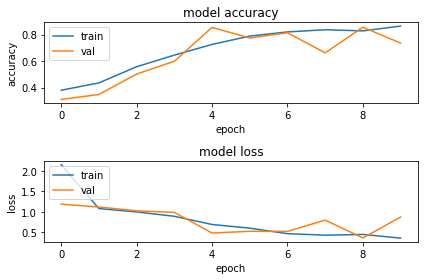

In [77]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [78]:
results = confusion_matrix(data_test.Label, prediction_labels)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(data_test.Label, prediction_labels))
print ('Report : ')
print (classification_report(data_test.Label, prediction_labels))

Confusion Matrix :
[[329   1   0]
 [212 144   0]
 [ 60   0 267]]
Accuracy Score : 0.7305034550839091
Report : 
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       330
           1       0.99      0.40      0.57       356
           2       1.00      0.82      0.90       327

    accuracy                           0.73      1013
   macro avg       0.85      0.74      0.73      1013
weighted avg       0.85      0.73      0.72      1013



                        Convolution Neural Network


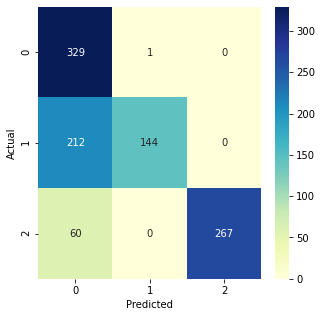

In [79]:
from sklearn.metrics import confusion_matrix
print("                        Convolution Neural Network")
conf_mat = confusion_matrix(data_test.Label, prediction_labels)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Testing CNN using KFold cross validation

In [80]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import zscore
from sklearn import metrics
import tensorflow as tf
import random

f_score=[]
fold = 10
label_names = ['0', '1', '2']
num_epochs = 5
batch_size = 32
#oos_y = []
#oos_pred = []
results = []
#for train, test in kf.split(data["tokens"], data['Label']):

for i in range(fold):
    print("Fold: ", i+1)
    random_num = np.random.randint(1,7000, 1)[0]
    data_train, data_test = train_test_split(data, test_size=0.10, shuffle = True, random_state = random_num)

    # # total training words
    totalTrainingWords = [word for tokens in data_train["tokens"] for word in tokens]

    # # Storing Length of the training sentence
    lengthTrainingSentences = [len(tokens) for tokens in data_train["tokens"]]

    # # training Vocabulary size
    trainingVocabSize = sorted(list(set(totalTrainingWords)))

    ## Total number of lines
    linesCount = len(data_train["tokens"])
    
    tokenizer = Tokenizer(num_words=len(trainingVocabSize), lower=True, char_level=False)
    tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
    training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

    train_word_index = tokenizer.word_index
    cnnTrainData = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    
    train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
    
    for word,index in train_word_index.items():
        train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
        
    test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
    cnnTestData = pad_sequences(test_sequences, maxlen= MAX_SEQUENCE_LENGTH)
    
    # Splitting train data into X_train and y_train
    y_train = data_train[label_names].values
    x_train = cnnTrainData
    y_tr = y_train
    
    # Splitting train data into X_test and y_test
    y_test = data_test[label_names].values
    x_test = cnnTestData
    y_tst = y_test
    
    # create model
    model = ConvolutionalNeuralNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))
    
    #Train Model
    history = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)
      
    # model evaluate
    
    print("Results for current fold:")
    results.append(model.evaluate(x_test, y_tst, batch_size=128))

model.save('model_CNN.h5')    

Fold:  1
Epoch 1/5
257/257 [==============================] - 25s 97ms/step - loss: 0.7568 - accuracy: 0.6880 - val_loss: 0.5052 - val_accuracy: 0.7958
Epoch 2/5
257/257 [==============================] - 24s 94ms/step - loss: 0.3434 - accuracy: 0.8690 - val_loss: 0.4520 - val_accuracy: 0.8145
Epoch 3/5
257/257 [==============================] - 24s 94ms/step - loss: 0.2948 - accuracy: 0.8856 - val_loss: 0.4550 - val_accuracy: 0.8101
Epoch 4/5
257/257 [==============================] - 24s 94ms/step - loss: 0.2636 - accuracy: 0.9011 - val_loss: 0.2223 - val_accuracy: 0.9012
Epoch 5/5
257/257 [==============================] - 21s 84ms/step - loss: 0.2403 - accuracy: 0.9097 - val_loss: 0.2187 - val_accuracy: 0.9286
Results for current fold:
8/8 [==============================] - 0s 60ms/step - loss: 0.2156 - accuracy: 0.9220
Fold:  2
Epoch 1/5
257/257 [==============================] - 25s 96ms/step - loss: 0.7591 - accuracy: 0.6752 - val_loss: 0.5413 - val_accuracy: 0.7892
Epoch 2/5
25

In [81]:
import statistics 

score = []
for i in results:
    score.append(i[1])
x = statistics.mean(score)
    
print("Kfold Mean: ", x)

Kfold Mean:  0.8974333703517914


In [82]:
# translator
translator = Translator()

In [83]:

# 1
hin_text =  "इसलाम सुंदर है"
print("Hindi: ", hin_text)

trans = translator.translate(hin_text, dest='en')
print('Translated:', trans.text)
texts = [trans.text]
print('Predicted Label: ',makeprediction(texts))

Hindi:  इसलाम सुंदर है
Translated: Islam is beautiful
Predicted Label:  0


In [84]:
# 0
hin_text =  " समाज वादी  पार्टी  जिंदाबाद "
print("Hindi: ", hin_text)

trans = translator.translate(hin_text, dest='en')
print('Translated:', trans.text)
texts = [trans.text]
print('Predicted Label: ',makeprediction(texts))

Hindi:   समाज वादी  पार्टी  जिंदाबाद 
Translated: Samajwadi Party Zindabad
Predicted Label:  0


In [85]:
# 2
hin_text =  "'गाजा में दीवाली की ढेरो बधाई मित्रो 😊💐  #IsraeliBombing 😂😂"
print("Hindi: ", hin_text)

trans = translator.translate(hin_text, dest='en')
print('Translated:', trans.text)
texts = [trans.text]
print('Predicted Label: ',makeprediction(texts))

Hindi:  'गाजा में दीवाली की ढेरो बधाई मित्रो 😊💐  #IsraeliBombing 😂😂
Translated: 'Happy Diwali greetings in Gaza Friends 😊💐 #IsraeliBombing 😂😂
Predicted Label:  2


In [86]:
#0
texts = ["Sachin: Once there was a fight between Yusuf and Bhajji. Sehwag: Paji, was he Muhammad Yusuf or Yusuf Youhana at that time. This man will not let him live even after retirement."]
print(makeprediction(texts))

2


In [87]:
# 2
texts = ["'@ Chatterj1Asking has blew you there, the police have blamed jihadis'"]
print(makeprediction(texts))

2


In [88]:
# 1
texts = ["She follows islam"]
print(makeprediction(texts))

0


### Reference
[1] "Convolutional Neural Networks for Sentence Classification" by Yoon Kim
